In [38]:
import numpy as np
import sympy
import random
import math
import matplotlib.pyplot as plt
from sympy import *
import scipy
from scipy.stats import chi2  
np.random.seed(8)
theta_min = -3
theta_max = 3
grid_num = 1001
thetagrid = np.linspace(theta_min, theta_max, grid_num)
jcr_u = np.linspace(theta_min, theta_max, grid_num)
jcr_l = np.linspace(theta_min, theta_max, grid_num)

theta = 0
x1 = np.random.normal(0) + theta
x2 = np.random.normal(0) + theta
alpha = 0.1
for i in range(len(thetagrid)):
    if (x1-thetagrid[i])**2 < chi2.isf(q=alpha, df=2):
        jcr_u[i] = thetagrid[i] + np.sqrt(chi2.isf(q=alpha, df=2)-(x1-thetagrid[i])**2)
        jcr_l[i] = thetagrid[i] - np.sqrt(chi2.isf(q=alpha, df=2)-(x1-thetagrid[i])**2)
    else:
        jcr_u[i] = 0 
        jcr_l[i] = 0
print(x1,x2)

0.09120471661981977 1.0912827332721105


In [39]:
theta_l = x1 - scipy.stats.norm.ppf( .95,0,1)
theta_u = x1 + scipy.stats.norm.ppf( .95,0,1)
x_l = x1 - np.sqrt(2)*scipy.stats.norm.ppf( .95,0,1)
x_u = x1 + np.sqrt(2)*scipy.stats.norm.ppf( .95,0,1)

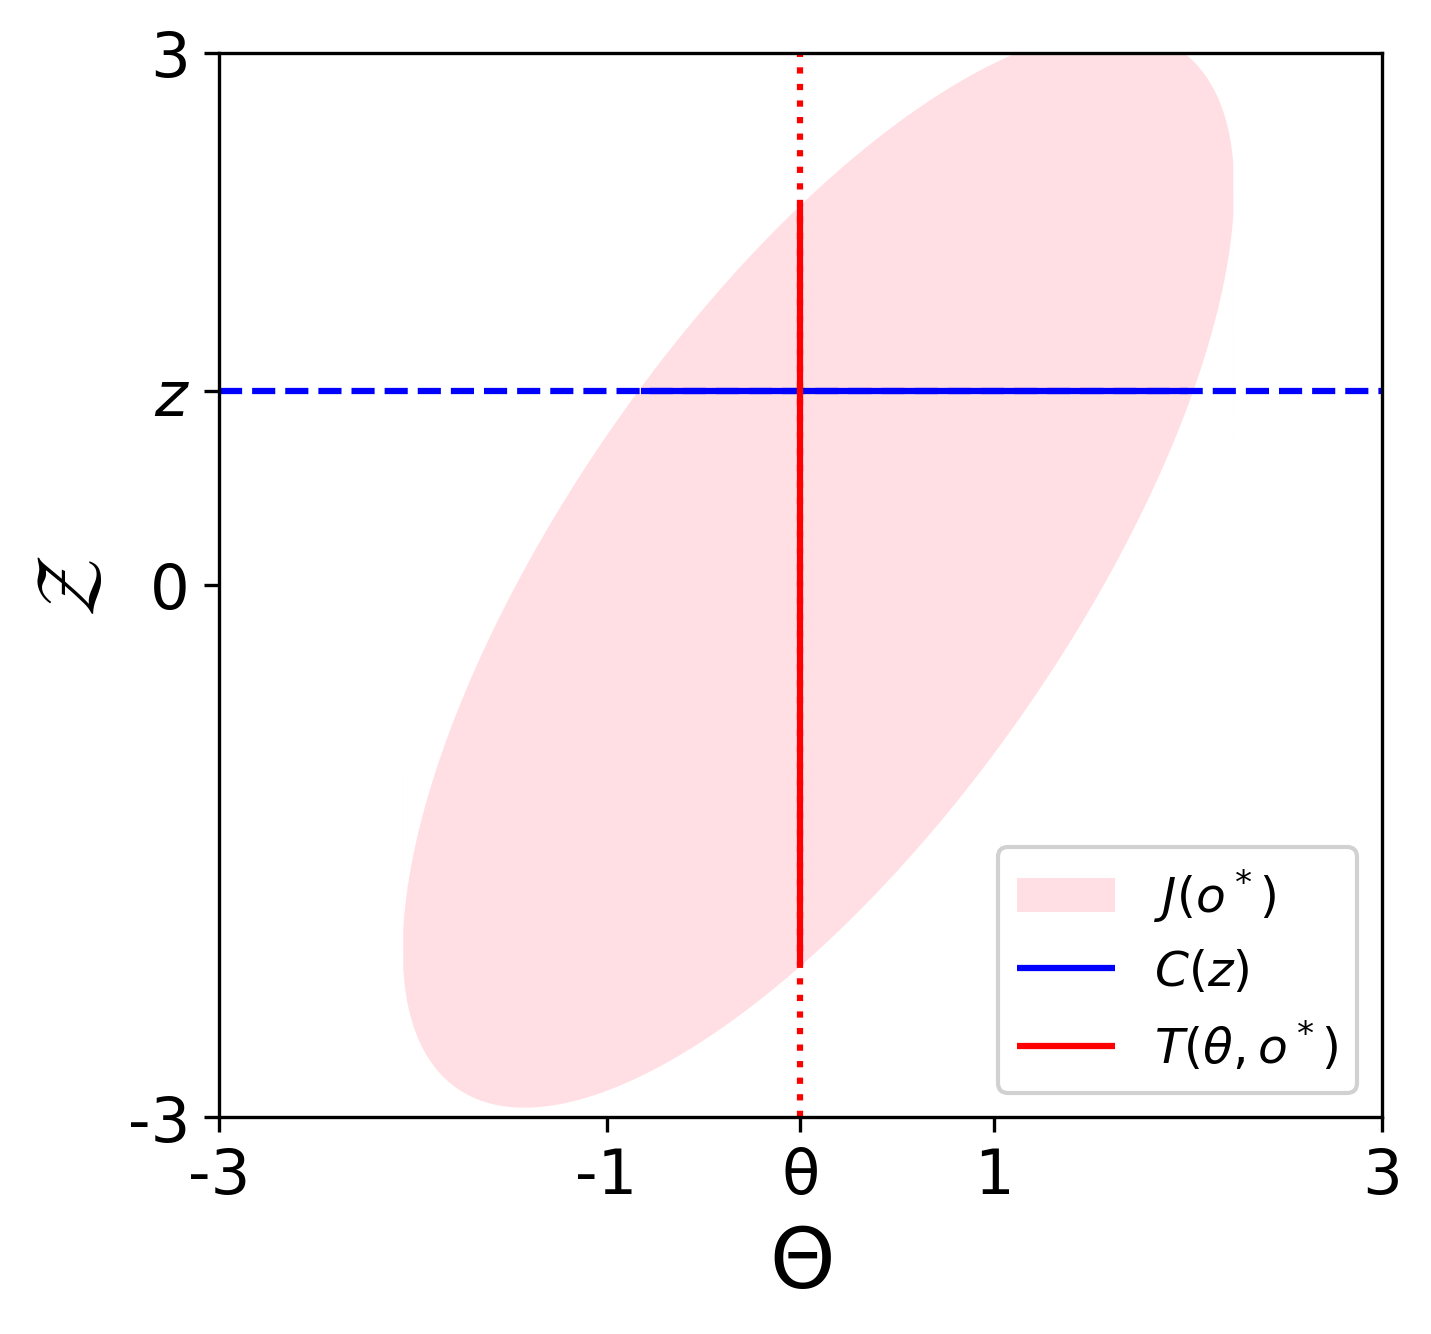

In [42]:
fig, ax = plt.subplots(dpi=300,figsize=(5,4.7))

ax.fill_between(thetagrid, jcr_l, jcr_u, alpha=.5, linewidth=0,label='$J(o^*)$',color='pink')
plt.hlines(x2, -0.82,2,colors='b', label='$C(z)$')
plt.hlines(x2, -3,3,colors='b',linestyles='dashed')

plt.vlines(theta, jcr_l[int((grid_num-1)/2)],jcr_u[int((grid_num-1)/2)],colors='red', label='$T(θ,o^*)$')
plt.vlines(theta, -3,3,colors='red',linestyles='dotted')
plt.yticks(ticks=[-3,0,x2,3], labels=[-3,0,'$z$',3],fontsize=15)
plt.xticks(ticks=[-3,-1,theta,1,3], labels=[-3,-1,'θ',1,3],fontsize=15)
plt.ylabel('$\mathcal{Z}$',size=20)
plt.xlabel('$\Theta$',size=20)

plt.ylabel('$\mathcal{Z}$',size=20)
plt.xlabel('$\Theta$',size=20)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right',fontsize=11.7,framealpha=0.9)
plt.savefig('J-C-T.png',bbox_inches = 'tight')
plt.show()